# Name: Tufan Kundu
# Reg no: 24MDT0184
# EDA lab
## 28 February

## Outlier detection on the Wine dataset after applying PCA

### Importing the necessary libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore 

### Loading the dataset

In [3]:
wine = load_wine()

## Creating dataframe with feature names
df = pd.DataFrame(wine.data,columns = wine.feature_names)
df['target'] = wine.target

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


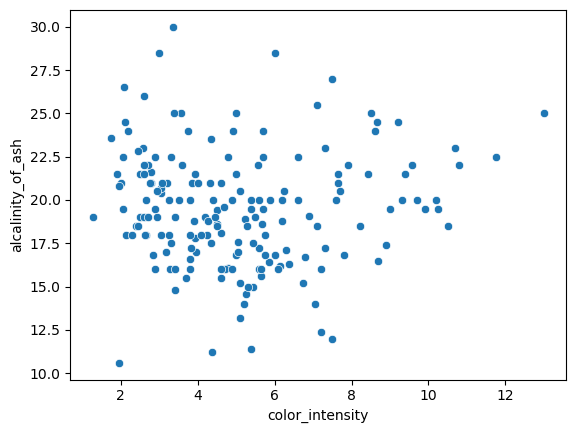

In [4]:
## selecting 2 features color_intensity and alcalinity_of_ash

sns.scatterplot(x = 'color_intensity', y = 'alcalinity_of_ash', data = df)
plt.show()

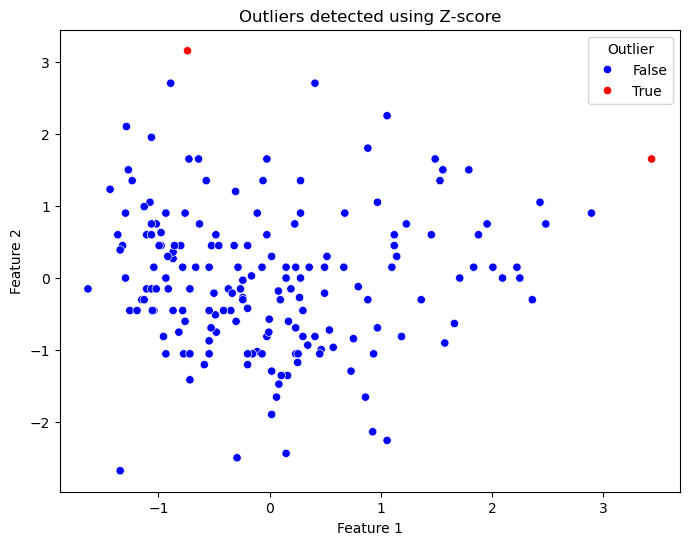

Z-score method detected outlier: 2


In [5]:
df_ = df.copy()

df_['Z_Feature1'] = zscore(df_['color_intensity'])
df_['Z_Feature2'] = zscore(df_['alcalinity_of_ash'])

# identifying outliers: Flag a data point as an outlier if the z-score is greater than 3
df_['Outlier_Z'] = ((df_['Z_Feature1'].abs()>3) | (df_['Z_Feature2'].abs()>3))

#plot the data points and highlight the outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Z_Feature1',y  = 'Z_Feature2',data = df_,hue = 'Outlier_Z', palette = {False:'blue',True:'red'})
plt.title("Outliers detected using Z-score")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title = 'Outlier')
plt.show()

# print the number of outliers detected using the Z-score method
print("Z-score method detected outlier:",df_['Outlier_Z'].sum())

### Extracting the feature and target

In [12]:
features = wine.feature_names
x = df.loc[:,features].values
y = df.loc[:,['target']].values

## Standardising the features
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [13]:
### Initializing PCA to reduce the data to 2 components

pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(x_std)

## Creating dataframe for the two principal components
principaldf = pd.DataFrame(data = principalcomponents, columns=['PC1','PC2'])

## Concatenate the target variable for plotting

final_df = pd.concat([principaldf,df[['target']]],axis = 1)

final_df

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


## Visualizing the result

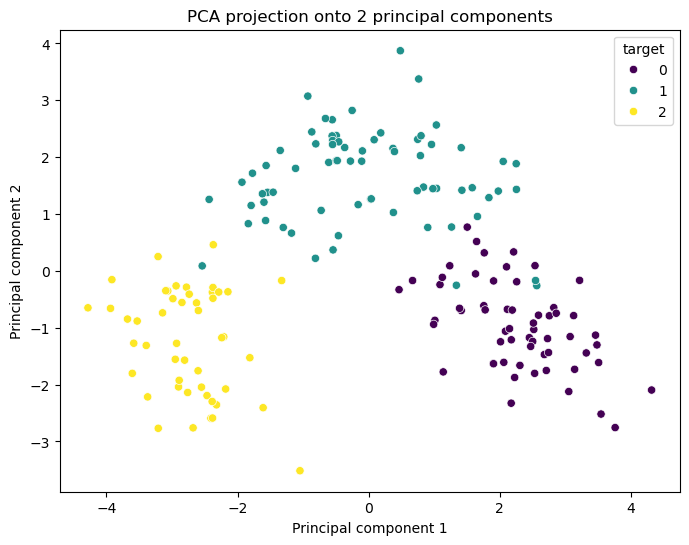

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y = 'PC2', hue = 'target', data = final_df, palette = 'viridis')
plt.title("PCA projection onto 2 principal components")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(title='target')
plt.show()

In [19]:
## Saving the updated dimention reduced dataset
final_df.to_csv("final_df.csv",index = False)

## Loading the updated dataset

In [20]:
data = pd.read_csv("final_df.csv")

In [28]:
data

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


### Outlier detection using the zscore method

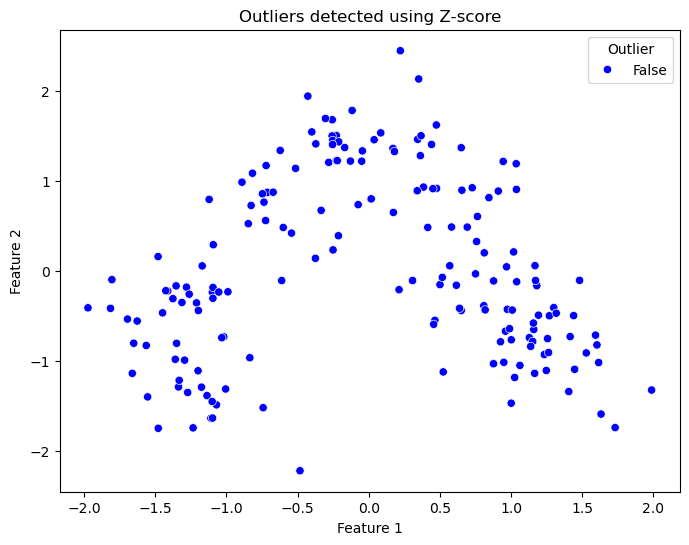

Z-score method detected outlier: 0


In [34]:
df_z = data.copy()

df_z['Z_Feature1'] = zscore(df_z['PC1'])
df_z['Z_Feature2'] = zscore(df_z['PC2'])

# identifying outliers: Flag a data point as an outlier if the z-score is greater than 3
df_z['Outlier_Z'] = ((df_z['Z_Feature1'].abs()>3) | (df_z['Z_Feature2'].abs()>3))

#plot the data points and highlight the outliers
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Z_Feature1',y  = 'Z_Feature2',data = df_z,hue = 'Outlier_Z', palette = {False:'blue',True:'red'})
plt.title("Outliers detected using Z-score")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title = 'Outlier')
plt.show()

# print the number of outliers detected using the Z-score method
print("Z-score method detected outlier:",df_z['Outlier_Z'].sum())

## No outlier detected by Zscore method